# 信號與系統實習


## 實驗開始步驟：

### (1)前往 https://github.com/htygithub/SS_EXP 點選右下角按鈕 "Download Zip"
### (2)開啟 Lesson_3_FIR_fiter_and_frequency_response

## 實驗十二
### FIR濾波器的應用
### 執行以下程式碼並觀察輸出

In [5]:
!pip install matplotlib
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 25.8 MB 202 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


ECG samples: (2500,)
Sampling frequency: 250


Text(0.5, 0, 'Time [s]')

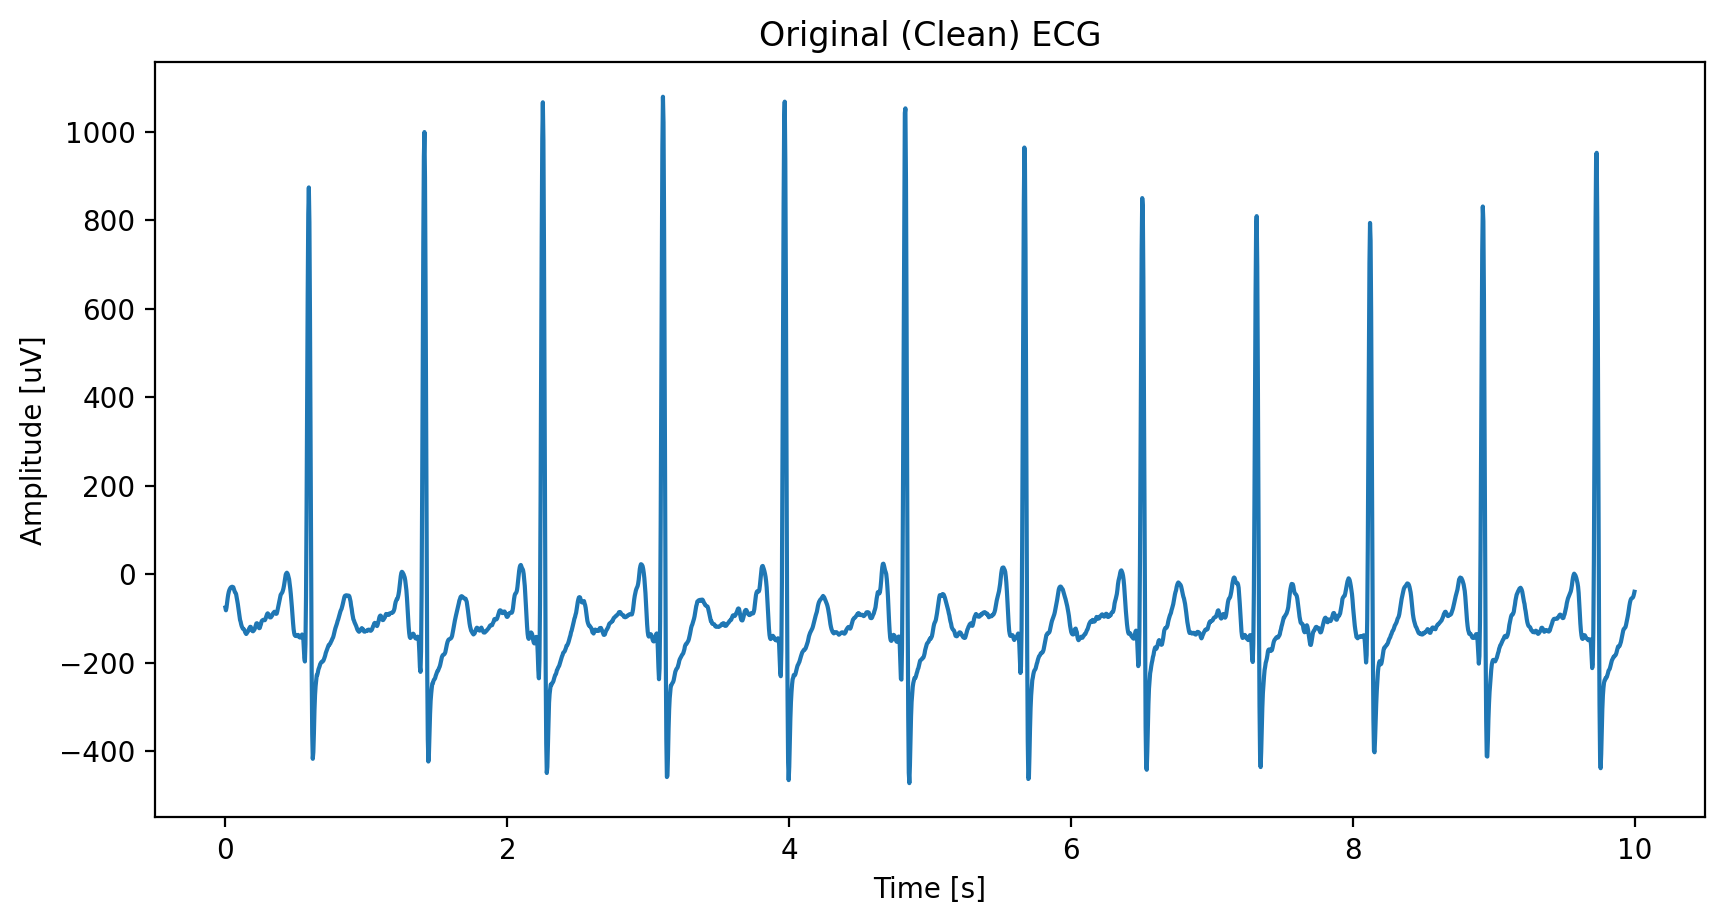

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

ecg_dict = loadmat('ecg.mat')
ecg = ecg_dict['ecgOriginal'].flatten()
fs = ecg_dict['fs'][0][0]
print('ECG samples:', ecg.shape)
print('Sampling frequency:', fs)
t = np.arange(0, ecg.size/fs, 1/fs)
plt.figure(figsize=(10,5), dpi=200)
plt.plot(t, ecg)
plt.title('Original (Clean) ECG');
plt.ylabel(r'Amplitude [uV]')
plt.xlabel('Time [s]')

## 問題十二
### 上圖為長度10秒之心電圖波形，用取樣頻率fs=250Hz 取樣，信號單位為uV
### <BR>(1) 參考實驗十一為將信號取快速傅利葉轉換, 繪製出信號頻譜，橫軸以類比頻率(Hz)來表示。

### <BR>(2) 產生一電力線偶合雜訊cos 波，Amplitude: 250uV, Phase: 0 rad, Frequency: 60 Hz，並繪製出受雜訊干擾之心電圖波形ecg_n

### <BR>(3) 繪製出受雜訊干擾的心電圖頻譜，橫軸以類比頻率(Hz)來表示。
    

Text(0.5, 1.0, 'The magnitude spectrum')

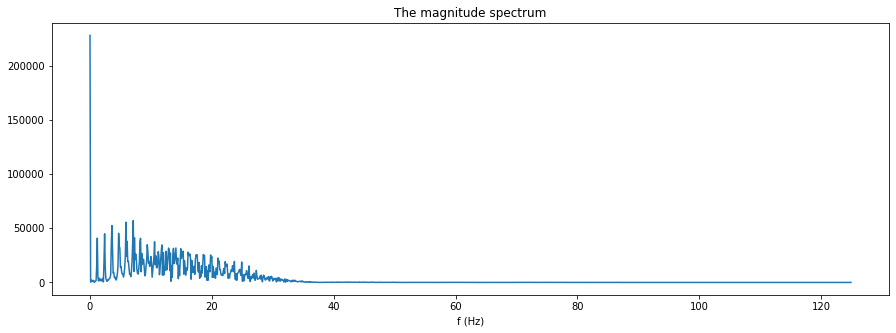

In [22]:
#問題十二(1)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

fs = 250
ecg_dict = loadmat('ecg.mat')
ecg = ecg_dict['ecgOriginal'].flatten()
ecgf = np.fft.fft(ecg)

#w_hat = np.arange(0, 2*np.pi, np.pi*2/fs)
#f = (w_hat/(2*np.pi))*fs

f = np.arange(0, fs, fs/ecg.size)

plt.figure(figsize=[15,5])
plt.plot(f[:int(len(ecgf)/2)], abs(ecgf)[:int(len(ecgf)/2)])
plt.xlabel(r'f (Hz)')
plt.title('The magnitude spectrum')

ECG samples: (2500,)
Sampling frequency: 250


Text(0.5, 0, 'Time [s]')

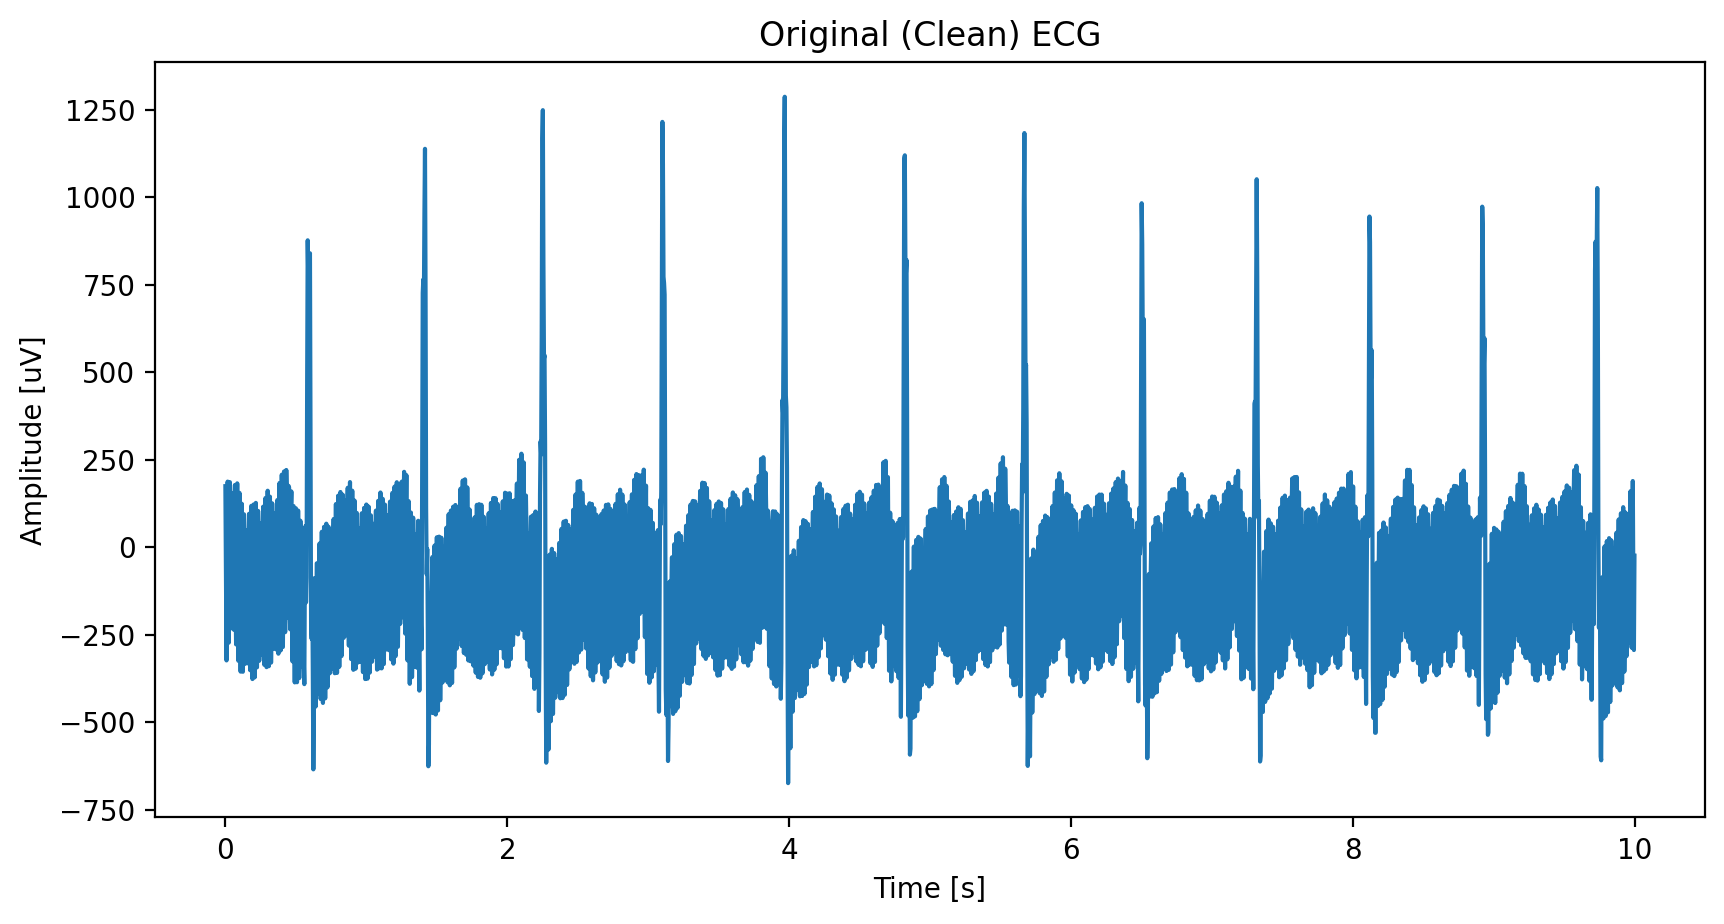

In [23]:
#問題十二(2)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

ecg_dict = loadmat('ecg.mat')
ecg = ecg_dict['ecgOriginal'].flatten()
fs = ecg_dict['fs'][0][0]

t = np.arange(0, ecg.size/fs, 1/fs)
x = 250*np.cos(2*np.pi*60*t)



print('ECG samples:', ecg.shape)
print('Sampling frequency:', fs)
plt.figure(figsize=(10,5), dpi=200)
ecg += x
plt.plot(t, ecg)
plt.title('Original (Clean) ECG');
plt.ylabel(r'Amplitude [uV]')
plt.xlabel('Time [s]')

Text(0.5, 1.0, 'The magnitude spectrum')

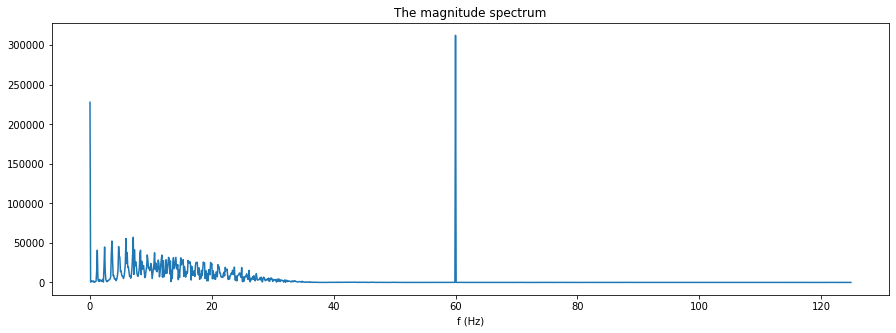

In [61]:
#問題十二(3)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

ecg_dict = loadmat('ecg.mat')
ecg = ecg_dict['ecgOriginal'].flatten()
fs = ecg_dict['fs'][0][0]

t = np.arange(0, ecg.size/fs, 1/fs)
x = 250*np.cos(2*np.pi*60*t)
ecg += x
ecgf = np.fft.fft(ecg)

f = np.arange(0, fs, fs/ecg.size)

plt.figure(figsize=[15,5])
plt.plot(f[:int(len(ecgf)/2)], abs(ecgf)[:int(len(ecgf)/2)])
plt.xlabel(r'f (Hz)')
plt.title('The magnitude spectrum')

## 實驗十三
### 傅利葉以及反傅利葉
### 下圖之程式碼主要目的是將ecg轉換至頻率空間之後，將直流成份濾除後，再轉回時域
### 執行以下程式碼並觀察輸出

/home/sam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Time [s]')

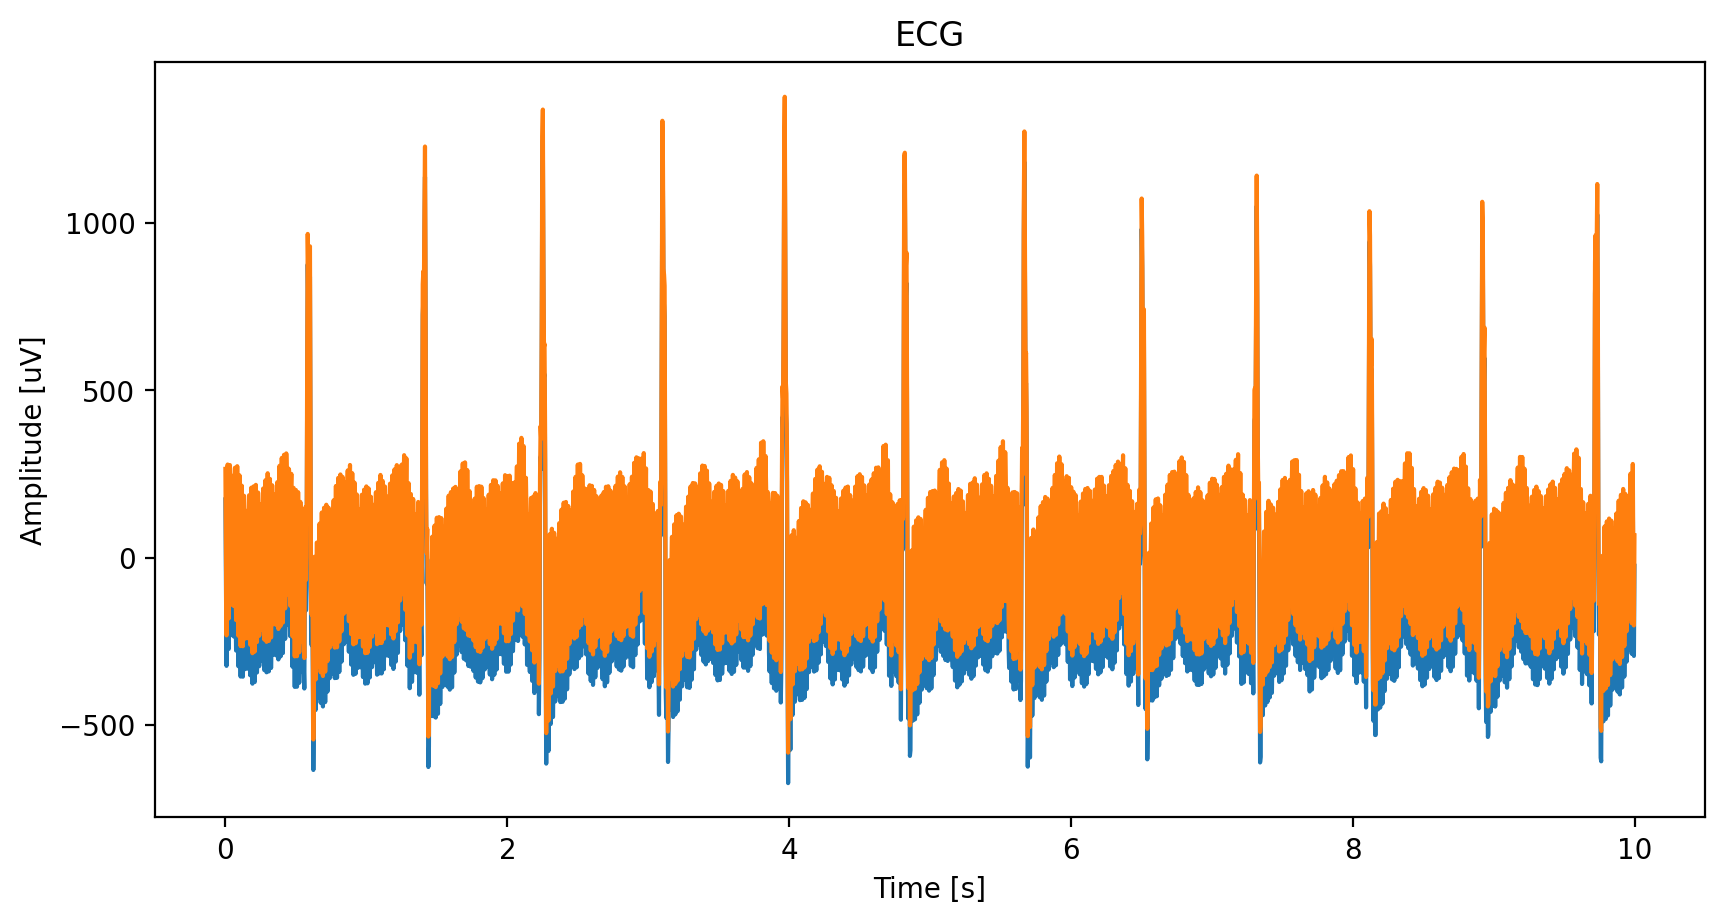

In [71]:
xf = np.fft.fft(ecg)
xf[0] = 0
ecg2 = np.fft.ifft(xf)
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(t, ecg)
plt.plot(t, ecg2)
plt.title('ECG');
plt.ylabel(r'Amplitude [uV]')
plt.xlabel('Time [s]')

## 問題十三

### <BR>(1) 參考實驗十三範例，先將受雜訊干擾之ecg_n，轉換至頻域後，將60Hz成份過濾掉再轉回時域，得到ecg_filtered。繪出ecg_filtered之時域及頻域信號

### <BR>(2) 參考實驗十一，設計一個三點平均濾波器 FIR filter, bk = [1/3, 1/3, 1/3] 並將ecg_n送入觀察結果

    

/home/sam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Time [s]')

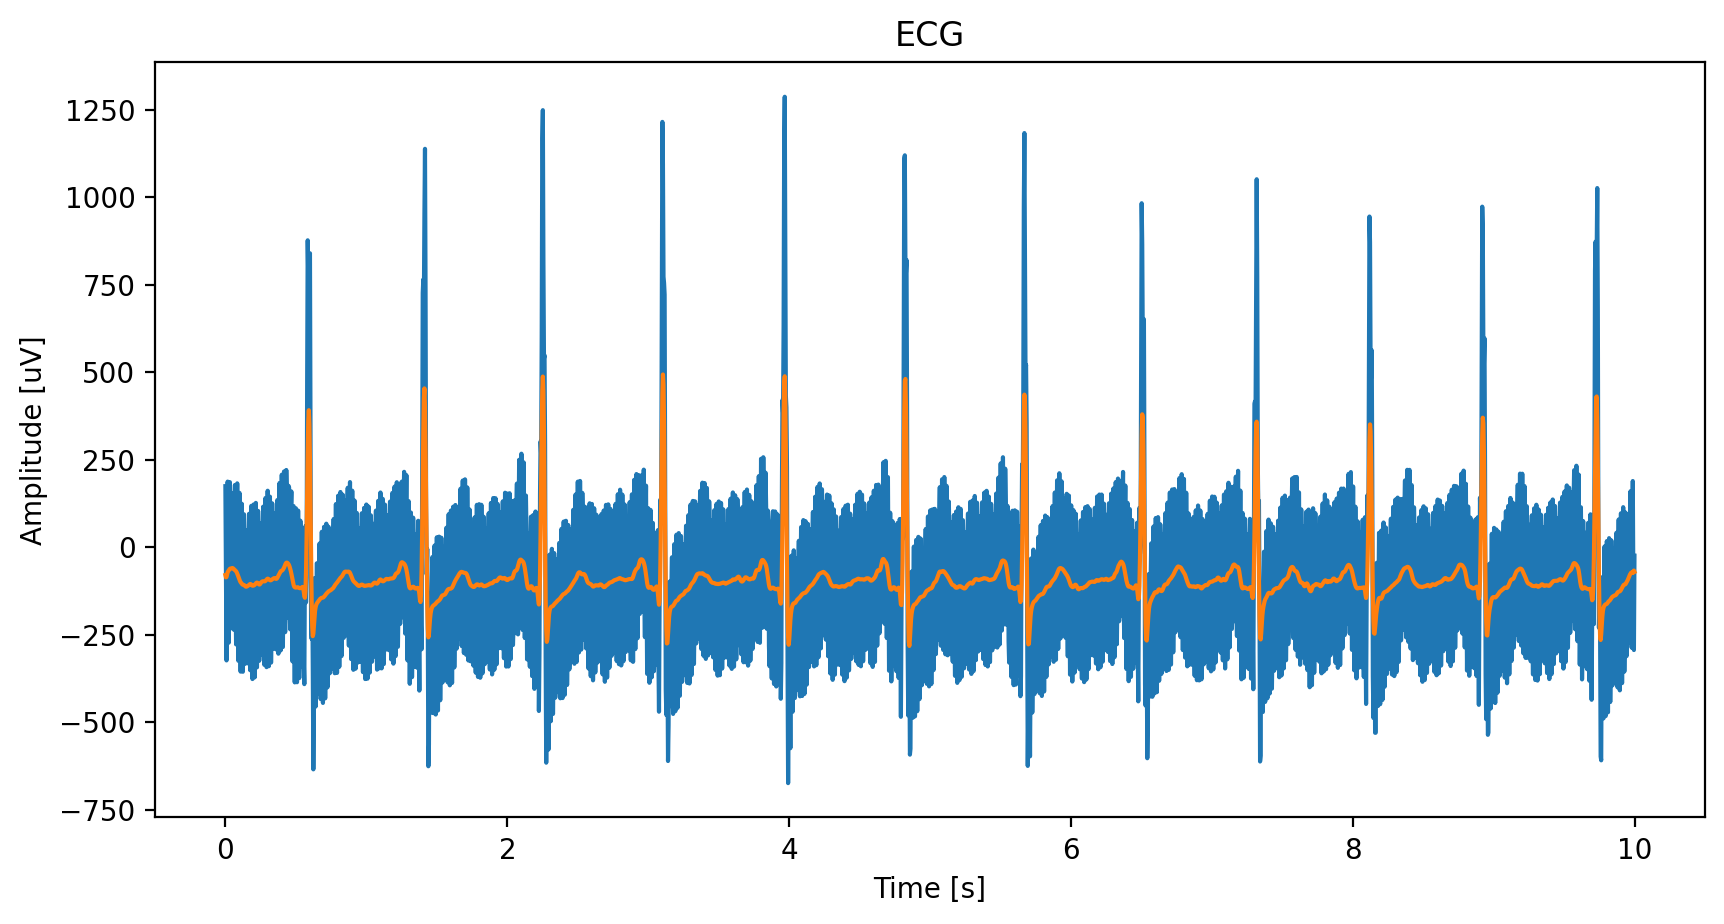

In [82]:
#問題十三(1)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

ecg_dict = loadmat('ecg.mat')
ecg = ecg_dict['ecgOriginal'].flatten()
t = np.arange(0, ecg.size/fs, 1/fs)
x = 250*np.cos(2*np.pi*60*t)
ecg += x
ecgf = np.fft.fft(ecg)


ecgf[600:]=0

ecg_filtered = np.fft.ifft(ecgf)
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(t, ecg)
plt.plot(t, ecg_filtered)
plt.title('ECG');
plt.ylabel(r'Amplitude [uV]')
plt.xlabel('Time [s]')

/home/sam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Time [s]')

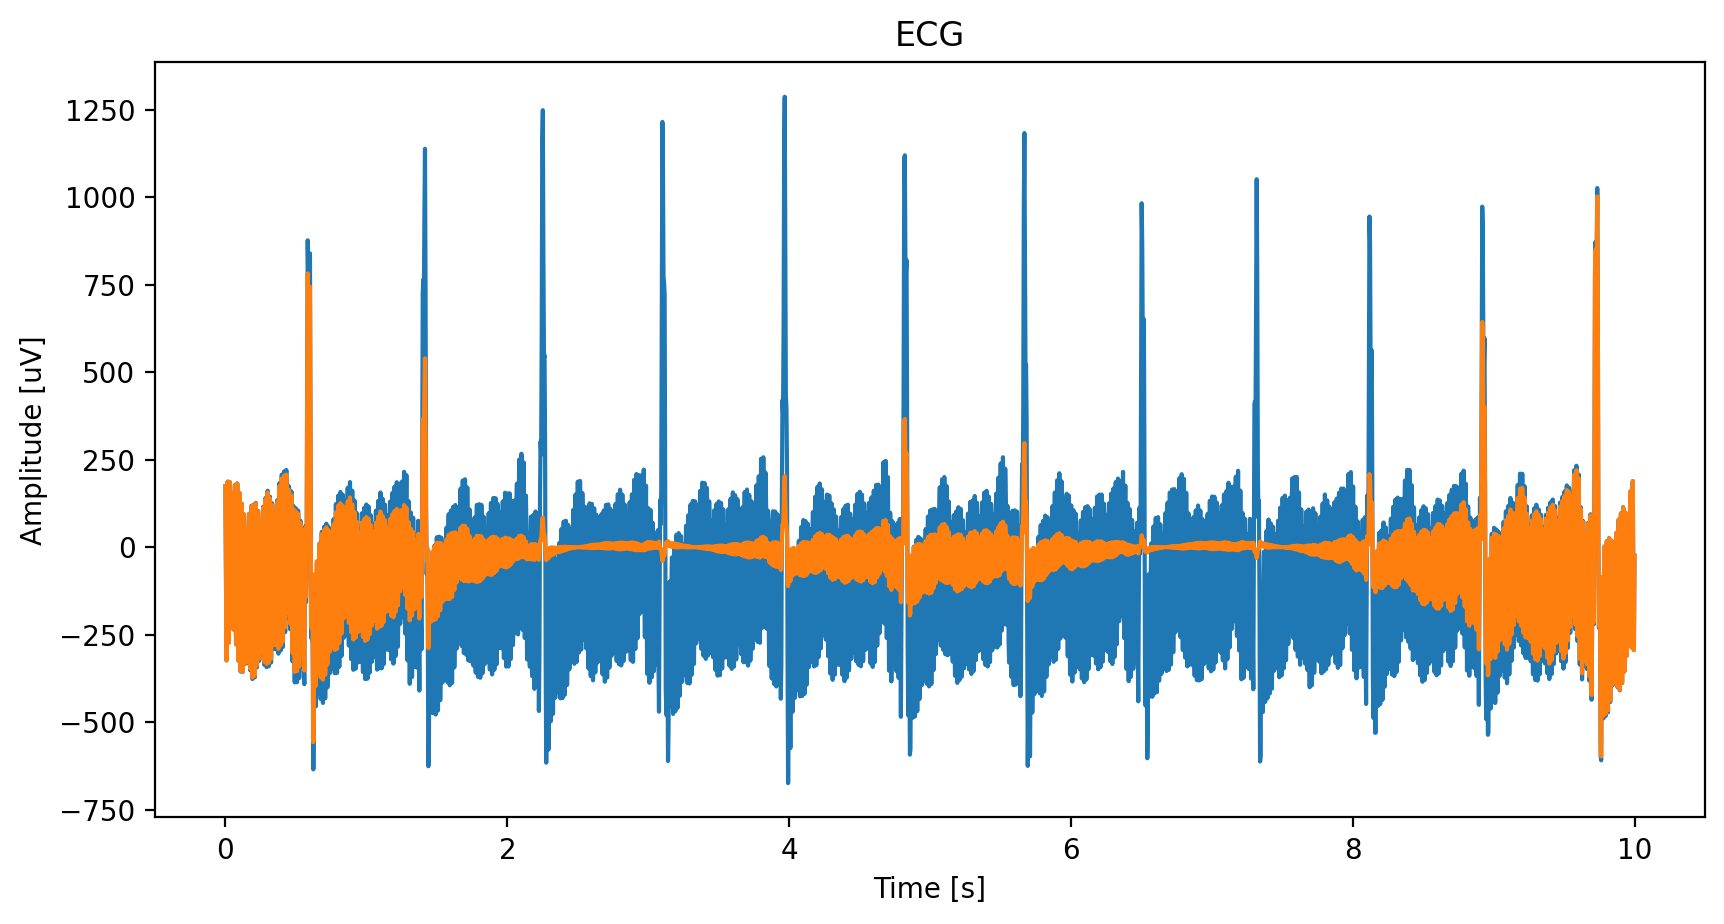

In [70]:
#問題十三(2)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

ecg_dict = loadmat('ecg.mat')
ecg = ecg_dict['ecgOriginal'].flatten()
t = np.arange(0, ecg.size/fs, 1/fs)
x = 250*np.cos(2*np.pi*60*t)
ecg += x

xf = np.fft.fft(ecg)

ecgf = xf*0;

ecgf[0] = 1/3*(xf[0])
ecgf[1] = 1/3*(xf[1] + xf[0])
            
for i in range(2, len(ecgf)):
    ecgf[i] = 1/3*(xf[i] + xf[i-1] + xf[i-2])

ecg3 = np.fft.ifft(ecgf)
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(t, ecg)
plt.plot(t, ecg3)
plt.title('ECG');
plt.ylabel(r'Amplitude [uV]')
plt.xlabel('Time [s]')

## 實驗十四
### 頻率響應
### 下面程式用來觀察頻率為20Hz的信號，經過fs=250Hz 取樣，並送入3點平均濾波器後，振輻的改變。


Amplitude of x: 1.0
Amplitude of y: 0.9175377866959373


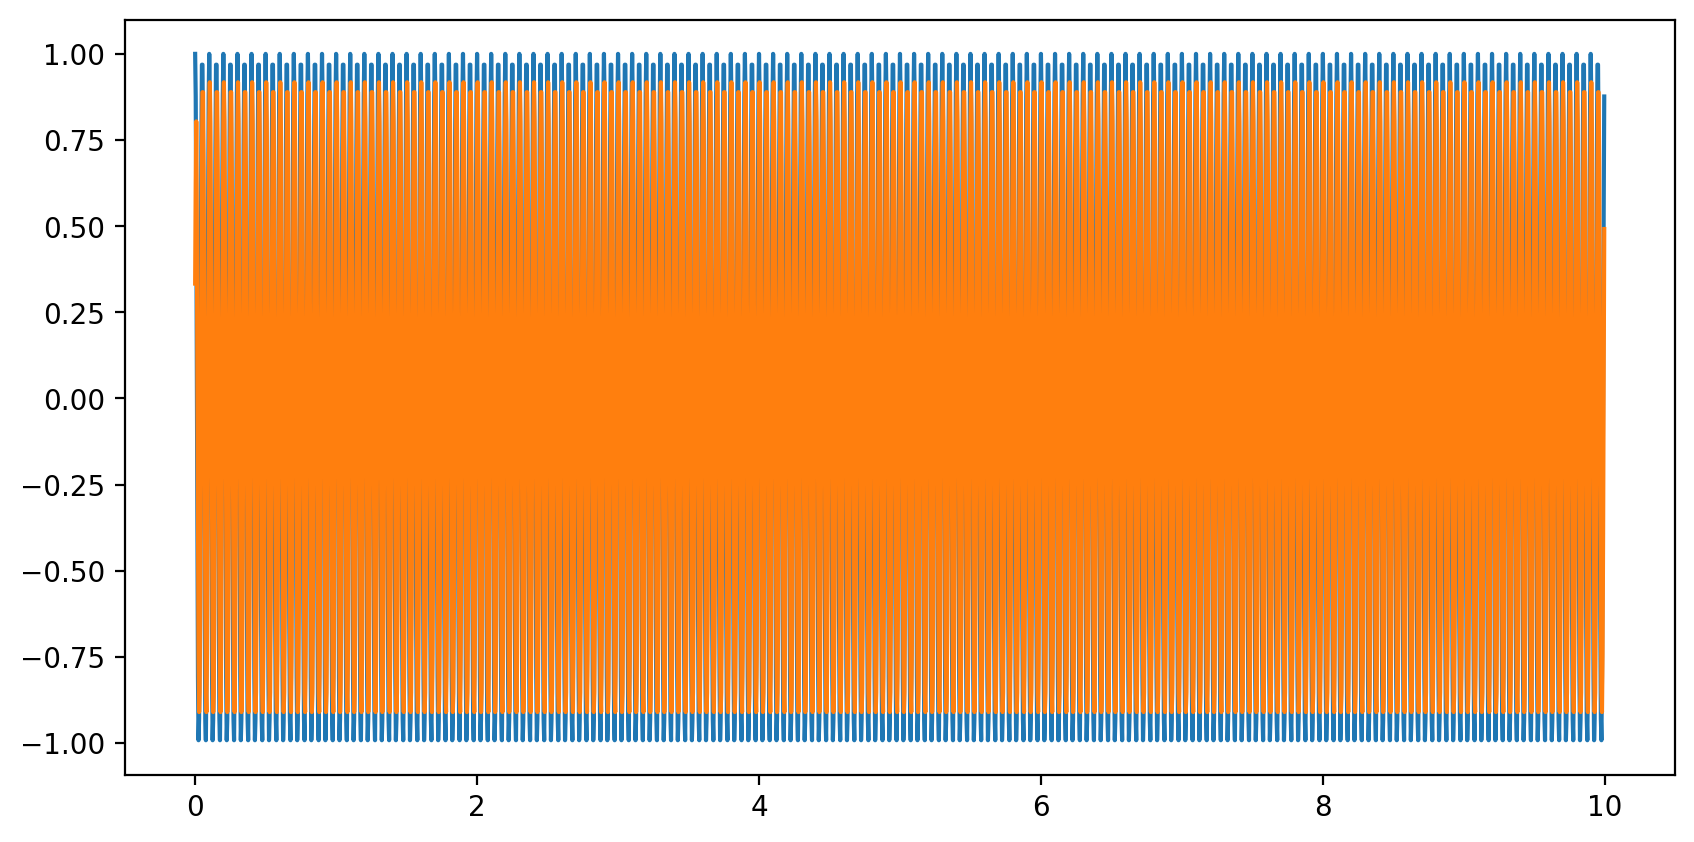

In [85]:
from scipy import signal
t = np.arange(0, ecg.size/fs, 1/fs)
x = np.cos(2*np.pi*20*t)
y = signal.lfilter([1/3, 1/3, 1/3], 1, x)

print('Amplitude of x:', np.max(x))
print('Amplitude of y:',np.max(y))
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(t, x)
plt.plot(t, y)

## 問題十四

### <BR>(1) 使用max來觀察弦波的振輻永遠正確嗎？
    
### <BR>(2) 改變輸入信號x之頻率由 0, 1, 2 ... 125Hz，觀察三點平均濾波器之輸出，並繪製出此FIR濾波器之等效頻率響應圖，橫軸為類比頻率(Hz)，縱軸為FIR filter之放大倍率。

### <BR>(3) 將FIR 改為 bk = [1/4, -2/4, 1/4] 並觀察其頻率響應。請問此FIR濾波器為高通或是低通濾波器。
    

In [86]:
#問題十四(1)


1.0
0.9175377866959373


In [ ]:
#問題十四(2)

Amplitude of x: 1.0
Amplitude of y: 0.25


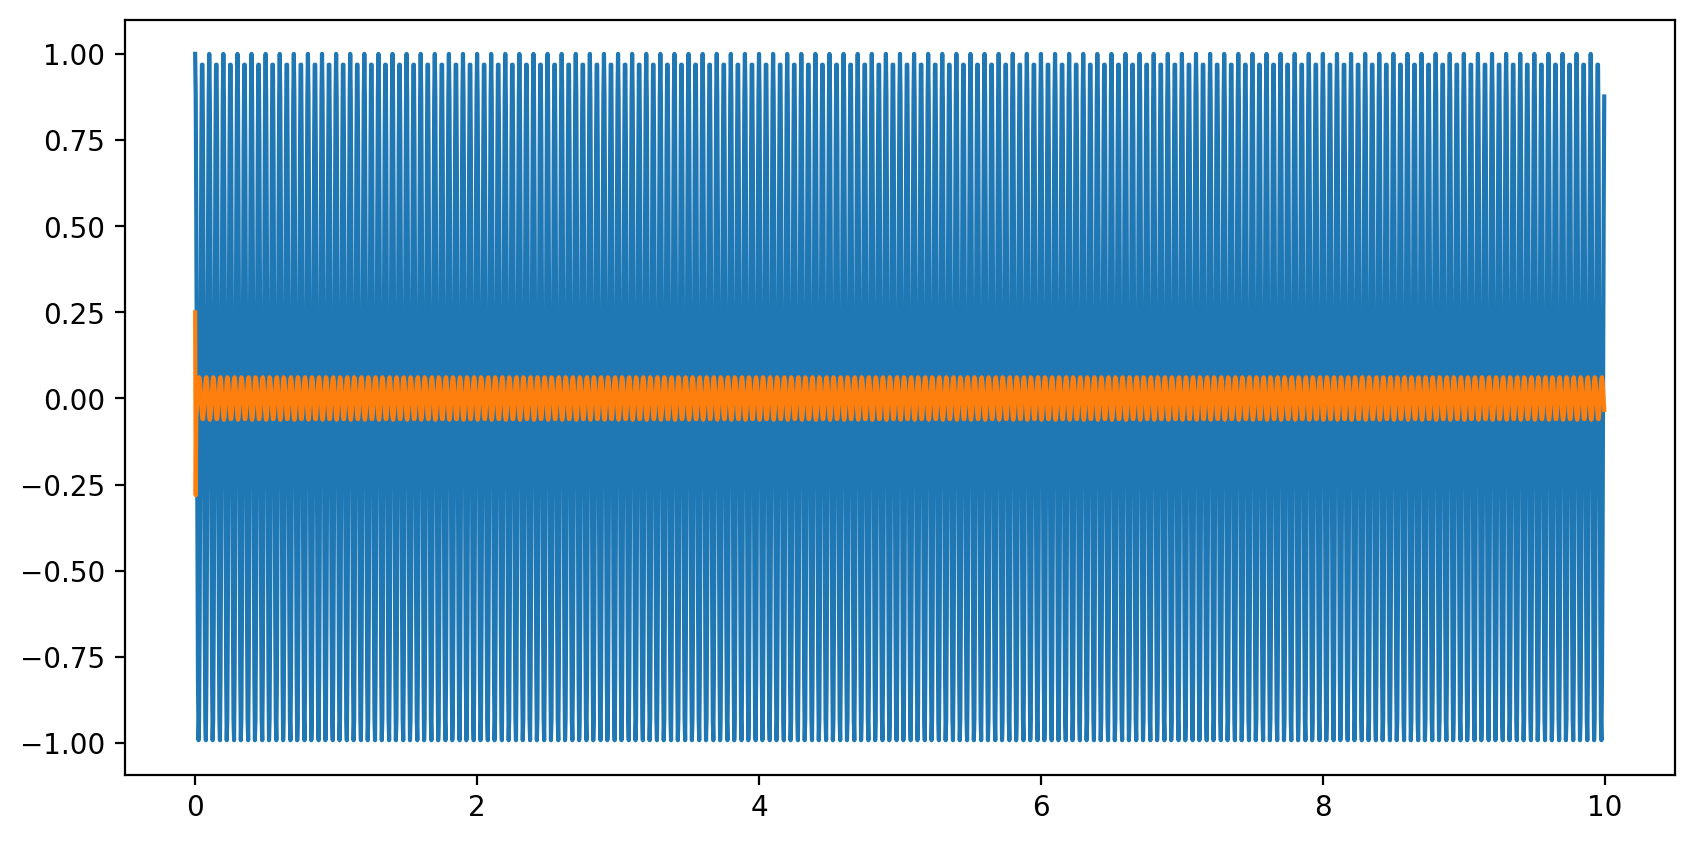

In [83]:
#問題十四(3)
from scipy import signal
t = np.arange(0, ecg.size/fs, 1/fs)
x = np.cos(2*np.pi*20*t)
y = signal.lfilter([1/4, -2/4, 1/4], 1, x)

print('Amplitude of x:', np.max(x))
print('Amplitude of y:',np.max(y))
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(t, x)
plt.plot(t, y)